<a href="https://colab.research.google.com/github/shivansh2310/Finance-Stuff/blob/main/Pair_Trading_Nifty_50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import pandas as pd
import yfinance as yf

def get_price_data(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
    return data

def calculate_correlation(data):
    return data.corr()

def select_pairs(data, correlation_threshold):
    pairs = []
    num_securities = len(data.columns)

    for i in range(num_securities - 1):
        for j in range(i + 1, num_securities):
            correlation = data.iloc[:, i].corr(data.iloc[:, j])
            if abs(correlation) > correlation_threshold:
                pairs.append((data.columns[i], data.columns[j], correlation))

    return pairs

# Define the Nifty 50 stock tickers
nifty100_tickers = ['SBIN.NS', 'RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS', 'HINDUNILVR.NS', 'ICICIBANK.NS', 'INFY.NS', 'ITC.NS', 'HDFC.NS', 'KOTAKBANK.NS', 'LT.NS', 'BAJAJFINSV.NS', 'AXISBANK.NS', 'ASIANPAINT.NS', 'MARUTI.NS', 'BAJFINANCE.NS', 'TATASTEEL.NS', 'HEROMOTOCO.NS', 'UL...SUNPHARMA.NS', 'TECHM.NS', 'HCLTECH.NS', 'COALINDIA.NS', 'ONGC.NS', 'UPL.NS', 'TATAMOTORS.NS', 'SHREECEM.NS', 'POWERGRID.NS', 'IOC.NS', 'WIPRO.NS', 'BPCL.NS', 'GAIL.NS', 'DRREDDY.NS', 'GRASIM.NS', 'INDUSINDBK.NS', 'JSWSTEEL.NS', 'HINDALCO.NS', 'BHARTIARTL.NS']

# Set the desired date range
start_date = '2022-01-01'
end_date = '2022-12-31'

# Fetch price data from Yahoo Finance
price_data = get_price_data(nifty100_tickers, start_date, end_date)

# Calculate the correlation matrix
correlation_matrix = calculate_correlation(price_data)

# Set the correlation threshold
correlation_threshold = 0.7

# Select pairs based on the correlation threshold
selected_pairs = select_pairs(correlation_matrix, correlation_threshold)

sorted_pairs = sorted(selected_pairs, key=lambda x: x[2])  # Sort the pairs based on correlation

# Print the selected pairs
for pair in sorted_pairs:
    print(f"Pair: {pair[0]}, {pair[1]}, Correlation: {pair[2]}")


[*********************100%***********************]  37 of 37 completed

1 Failed download:
- UL...SUNPHARMA.NS: No timezone found, symbol may be delisted
Pair: ITC.NS, WIPRO.NS, Correlation: -0.9839433309088744
Pair: HEROMOTOCO.NS, ONGC.NS, Correlation: -0.9713766258896992
Pair: ITC.NS, TCS.NS, Correlation: -0.9674865960984012
Pair: COALINDIA.NS, WIPRO.NS, Correlation: -0.9660734520989745
Pair: HINDUNILVR.NS, ONGC.NS, Correlation: -0.9647210311341541
Pair: TATASTEEL.NS, WIPRO.NS, Correlation: -0.9626732745192208
Pair: ITC.NS, TECHM.NS, Correlation: -0.9590902314584021
Pair: IOC.NS, MARUTI.NS, Correlation: -0.95370794863582
Pair: BPCL.NS, ITC.NS, Correlation: -0.9524489265473559
Pair: ONGC.NS, TATASTEEL.NS, Correlation: -0.9513812798804945
Pair: MARUTI.NS, ONGC.NS, Correlation: -0.949637573888377
Pair: HINDUNILVR.NS, IOC.NS, Correlation: -0.9477565115243919
Pair: TATASTEEL.NS, TCS.NS, Correlation: -0.9452730490037814
Pair: HEROMOTOCO.NS, IOC.NS, Correlation: -0.943913295298994
Pair: COA

## HDFC AND HADFCBANK Pair

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


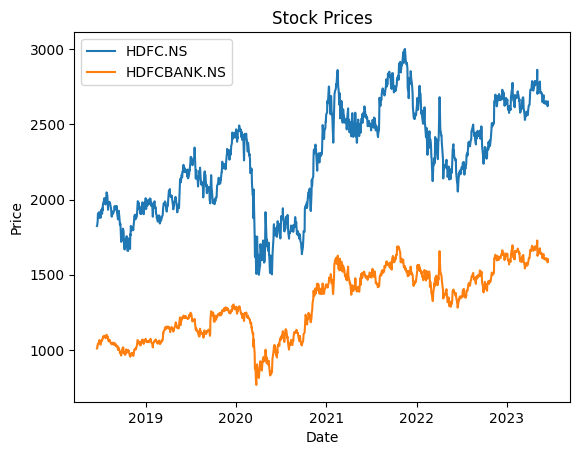

In [3]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the tickers of the two stocks
ticker1 = "HDFC.NS"  # Replace with the ticker symbol of the first stock
ticker2 = "HDFCBANK.NS"  # Replace with the ticker symbol of the second stock

# Fetch the historical price data from Yahoo Finance
stock1_data = yf.download(ticker1, period="5y")  # Adjust the period as needed
stock2_data = yf.download(ticker2, period="5y")  # Adjust the period as needed

# Extract the closing prices
stock1_close = stock1_data['Close']
stock2_close = stock2_data['Close']

# Plot the prices on the same graph
plt.plot(stock1_close, label=ticker1)
plt.plot(stock2_close, label=ticker2)

# Set the plot title and labels
plt.title("Stock Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()

# Display the plot
plt.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


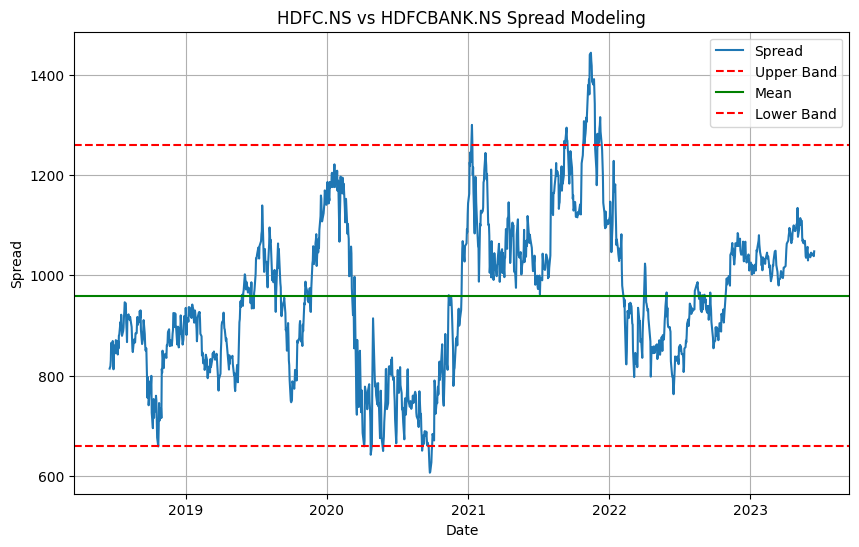

In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the ticker symbols for the two securities in the spread
ticker1 = 'HDFC.NS'
ticker2 = 'HDFCBANK.NS'

# Download historical data from Yahoo Finance
stock1_data = yf.download(ticker1, period="5y")  # Adjust the period as needed
stock2_data = yf.download(ticker2, period="5y")

# Extract the closing prices of the securities
close1 = stock1_data['Close']
close2 = stock2_data['Close']

# Calculate the spread between the two securities
spread = close1 - close2

# Perform spread modeling
spread_mean = np.mean(spread)
spread_std = np.std(spread)

# Generate upper and lower bands for spread trading
upper_band = spread_mean + 2 * spread_std
lower_band = spread_mean - 2 * spread_std

# Plot the spread and bands
plt.figure(figsize=(10, 6))
plt.plot(spread, label='Spread')
plt.axhline(upper_band, color='r', linestyle='--', label='Upper Band')
plt.axhline(spread_mean, color='g', linestyle='-', label='Mean')
plt.axhline(lower_band, color='r', linestyle='--', label='Lower Band')
plt.title(f"{ticker1} vs {ticker2} Spread Modeling")
plt.xlabel('Date')
plt.ylabel('Spread')
plt.legend()
plt.grid(True)
plt.show()


## HDFC AND KOTAKBANK Pair

> Indented block



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


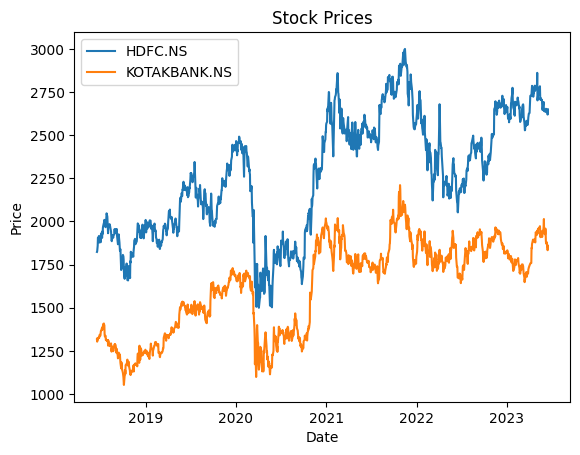

In [5]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the tickers of the two stocks
ticker1 = "HDFC.NS"  # Replace with the ticker symbol of the first stock
ticker2 = "KOTAKBANK.NS"  # Replace with the ticker symbol of the second stock

# Fetch the historical price data from Yahoo Finance
stock1_data = yf.download(ticker1, period="5y")  # Adjust the period as needed
stock2_data = yf.download(ticker2, period="5y")  # Adjust the period as needed

# Extract the closing prices
stock1_close = stock1_data['Close']
stock2_close = stock2_data['Close']

# Plot the prices on the same graph
plt.plot(stock1_close, label=ticker1)
plt.plot(stock2_close, label=ticker2)

# Set the plot title and labels
plt.title("Stock Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()

# Display the plot
plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


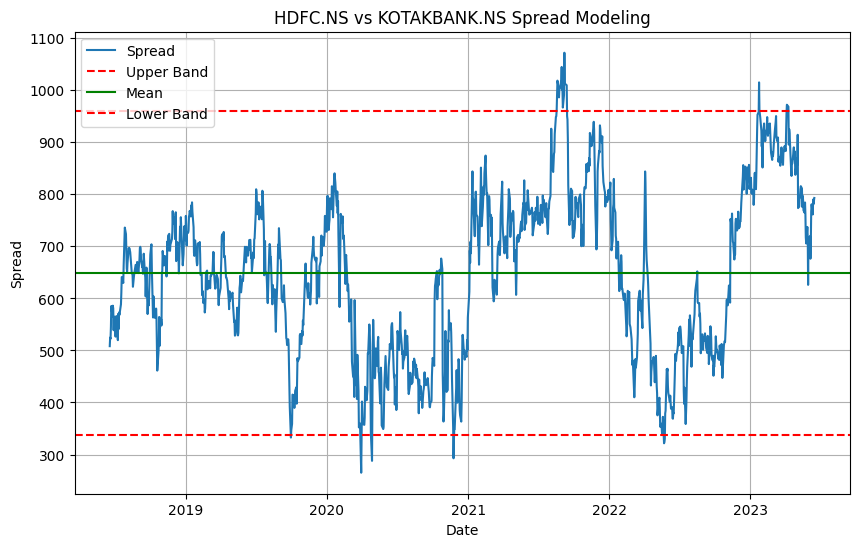

In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the ticker symbols for the two securities in the spread
ticker1 = 'HDFC.NS'
ticker2 = 'KOTAKBANK.NS'

# Download historical data from Yahoo Finance
stock1_data = yf.download(ticker1, period="5y")  # Adjust the period as needed
stock2_data = yf.download(ticker2, period="5y")

# Extract the closing prices of the securities
close1 = stock1_data['Close']
close2 = stock2_data['Close']

# Calculate the spread between the two securities
spread = close1 - close2

# Perform spread modeling
spread_mean = np.mean(spread)
spread_std = np.std(spread)

# Generate upper and lower bands for spread trading
upper_band = spread_mean + 2 * spread_std
lower_band = spread_mean - 2 * spread_std

# Plot the spread and bands
plt.figure(figsize=(10, 6))
plt.plot(spread, label='Spread')
plt.axhline(upper_band, color='r', linestyle='--', label='Upper Band')
plt.axhline(spread_mean, color='g', linestyle='-', label='Mean')
plt.axhline(lower_band, color='r', linestyle='--', label='Lower Band')
plt.title(f"{ticker1} vs {ticker2} Spread Modeling")
plt.xlabel('Date')
plt.ylabel('Spread')
plt.legend()
plt.grid(True)
plt.show()


## COALINDIA AND ITC Pair

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


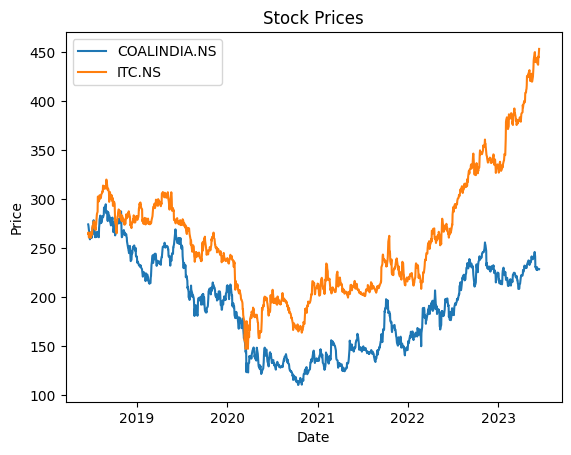

In [10]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the tickers of the two stocks
ticker1 = "COALINDIA.NS"  # Replace with the ticker symbol of the first stock
ticker2 = "ITC.NS"  # Replace with the ticker symbol of the second stock

# Fetch the historical price data from Yahoo Finance
stock1_data = yf.download(ticker1, period="5y")  # Adjust the period as needed
stock2_data = yf.download(ticker2, period="5y")  # Adjust the period as needed

# Extract the closing prices
stock1_close = stock1_data['Close']
stock2_close = stock2_data['Close']

# Plot the prices on the same graph
plt.plot(stock1_close, label=ticker1)
plt.plot(stock2_close, label=ticker2)

# Set the plot title and labels
plt.title("Stock Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()

# Display the plot
plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


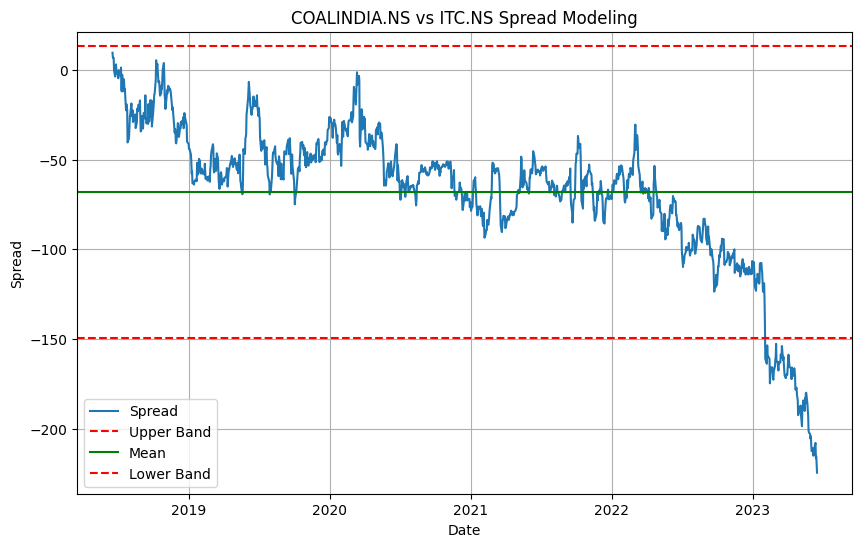

In [11]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the ticker symbols for the two securities in the spread
ticker1 = 'COALINDIA.NS'
ticker2 = 'ITC.NS'

# Download historical data from Yahoo Finance
stock1_data = yf.download(ticker1, period="5y")  # Adjust the period as needed
stock2_data = yf.download(ticker2, period="5y")

# Extract the closing prices of the securities
close1 = stock1_data['Close']
close2 = stock2_data['Close']

# Calculate the spread between the two securities
spread = close1 - close2

# Perform spread modeling
spread_mean = np.mean(spread)
spread_std = np.std(spread)

# Generate upper and lower bands for spread trading
upper_band = spread_mean + 2 * spread_std
lower_band = spread_mean - 2 * spread_std

# Plot the spread and bands
plt.figure(figsize=(10, 6))
plt.plot(spread, label='Spread')
plt.axhline(upper_band, color='r', linestyle='--', label='Upper Band')
plt.axhline(spread_mean, color='g', linestyle='-', label='Mean')
plt.axhline(lower_band, color='r', linestyle='--', label='Lower Band')
plt.title(f"{ticker1} vs {ticker2} Spread Modeling")
plt.xlabel('Date')
plt.ylabel('Spread')
plt.legend()
plt.grid(True)
plt.show()